<a href="https://colab.research.google.com/github/alain-michael/Income-analysis-and-prediction/blob/main/Income%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('adult.data',names=["age","workclass","fnlwgt","education","education-num","marital-status","ocupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])
c = []

for i in range(len(df)):
  if df['native-country'][i] == ' ?':
    c.append(i)
df = df.drop(labels=c)

In [4]:
null = np.where(df.isin([' ?']))

In [5]:
to_drop = null[0]
to_drop = np.unique(to_drop)

In [6]:
df.reset_index(inplace=True,drop=True)
df = df.drop(labels=to_drop)

In [7]:
workclass = df['workclass'].unique()
education = df['education'].unique()
marital_status = df['marital-status'].unique()
occupation = df['ocupation'].unique()
relationship = df['relationship'].unique()
race = df['race'].unique()
sex = df['sex'].unique()
native_country = df['native-country'].unique()
income = df['income'].unique()
giver = [list(workclass),list(education),list(marital_status),list(occupation),list(relationship),list(race),list(sex),list(native_country),list(income)]

In [8]:
def convert_to_cat(df,giver):
  df['workclass'] = df['workclass'].replace(giver[0],range(len(giver[0])))
  df['education'] = df['education'].replace(giver[1],range(len(giver[1])))
  df['marital-status'] = df['marital-status'].replace(giver[2],range(len(giver[2])))
  df['ocupation'] = df['ocupation'].replace(giver[3],range(len(giver[3])))
  df['relationship'] = df['relationship'].replace(giver[4],range(len(giver[4])))
  df['race'] = df['race'].replace(giver[5],range(len(giver[5])))
  df['sex'] = df['sex'].replace(giver[6],range(len(giver[6])))
  df['native-country'] = df['native-country'].replace(giver[7],range(len(giver[7])))
  df['income'] = df['income'].replace(giver[8],range(len(giver[8])))
  return df


In [9]:
import seaborn as snb

above = {}
below = {}
for i in range(len(df)):
  try:
    if df["income"][i] == " >50K":
      above[df["education"][i]] += 1
    else:
      below[df["education"][i]] += 1
  except:
    try:
      if df["income"][i] == " >50K":
        above[df["education"][i]] = 0
      else:
        below[df["education"][i]] = 0
    except:
      continue

In [10]:
import altair as alt
alt.Chart(df[df.columns][:1000]).mark_bar().encode(
    x='race',
    y='count()',
    color='income',
    order=alt.Order(
        'race',
        sort='ascending'
    )
).properties(
    width=600
)


alt.Chart(...)

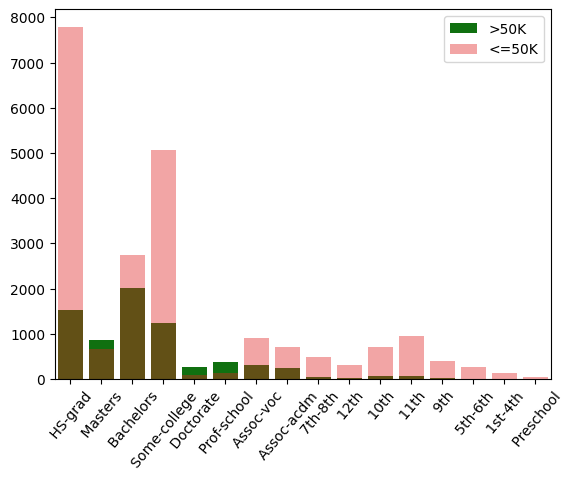

In [11]:
snb.barplot(data=above, color="green", label=">50K")
snb.barplot(data=below, color="red", alpha=0.4, label="<=50K")
plt.legend(loc="upper right")
plt.xticks(rotation=50)
plt.show()

In [13]:
len(df['native-country'])

30162

In [28]:
for x,y in zip(df['native-country'], df['income']):


0        39
1        50
2        38
3        53
4        28
         ..
31973    27
31974    40
31975    58
31976    22
31977    52
Name: age, Length: 30162, dtype: int64
0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
31973              Private
31974              Private
31975              Private
31976              Private
31977         Self-emp-inc
Name: workclass, Length: 30162, dtype: object
0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
31973    257302
31974    154374
31975    151910
31976    201490
31977    287927
Name: fnlwgt, Length: 30162, dtype: int64
0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
31973     Assoc-acdm
31974        HS-grad
31975        HS-grad
31976        HS-grad
31977        HS-grad
Name: education, Length: 30162, dtype

In [59]:
x = np.unique([x for x, y in zip(df['native-country'], df['income']) if y == " >50K"], return_counts=True)
countries = {i:j for i,j in zip(x[0],x[1]**0.1)}
y = np.unique([x for x, y in zip(df['native-country'], df['income']) if y == " <=50K"], return_counts=True)
others = {i:j for i,j in zip(y[0],y[1]**0.1)}

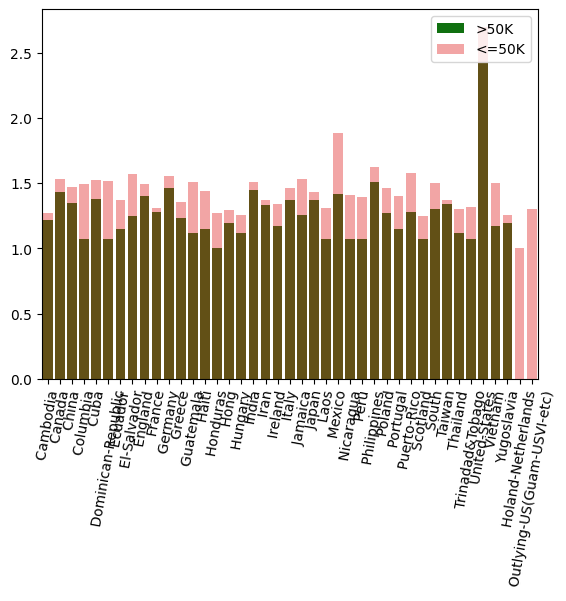

In [60]:
snb.barplot(data= countries, color="green", label=">50K")
snb.barplot(data= others, color="red", alpha=0.4, label="<=50K")
plt.legend(loc="upper right")
plt.xticks(rotation=80)
plt.show()

In [25]:
df.reset_index(inplace=True,drop=True)
df2 = convert_to_cat(df,giver)


In [26]:
print(df2)
X_train = df2[df2.columns[:-1]].values
y_train = df2[df2.columns[-1]].values
X_train = StandardScaler().fit_transform(X_train)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
30157   27          2  257302          6             12               1   
30158   40          2  154374          1              9               1   
30159   58          2  151910          1              9               6   
30160   22          2  201490          1              9               0   
30161   52          5  287927          1              9               1   

       ocupation  relationship  race  sex  capital-gain  capital-loss  \
0              0          

In [27]:
model = Sequential([Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')],name='my_model')

In [28]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=11)

Epoch 1/11


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


943/943 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.7928
Epoch 2/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8273
Epoch 3/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8378
Epoch 4/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8423
Epoch 5/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8436
Epoch 6/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8445
Epoch 7/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8454
Epoch 8/11
943/943 [==============================] - 2s 2ms/step - loss: 0.3318 - accuracy: 0.8452
Epoch 9/11
943/943 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8458
Epoch 10/11
943/943 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8449
Epoch 11/1

In [29]:
df = pd.read_csv('adult.test',names=["age","workclass","fnlwgt","education","education-num","marital-status","ocupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])
c = []
for i in range(len(df)):
  if df['native-country'][i] == ' ?':
    c.append(i)
df = df.drop(labels=c)
df = df.drop(labels=0)

In [30]:
null = np.where(df.isin([' ?']))
to_drop = null[0]
to_drop = np.unique(to_drop)

In [31]:
df.reset_index(inplace=True,drop=True)
df = df.drop(labels=to_drop)

In [32]:
df3 = convert_to_cat(df,giver)
df3['income'] = df3['income'].replace([' <=50K.',' >50K.'],[0,1])
print(df3.iloc[1])

age                    38
workclass               2
fnlwgt            89814.0
education               1
education-num         9.0
marital-status          1
ocupation               7
relationship            1
race                    0
sex                     0
capital-gain          0.0
capital-loss          0.0
hours-per-week       50.0
native-country          0
income                  0
Name: 1, dtype: object


In [33]:
X_test = df3[df3.columns[:-1]].values
y_test = df3[df3.columns[-1]].values
X_test = StandardScaler().fit_transform(X_test)
print(y_test)

[0 0 1 ... 0 0 1]


In [34]:
model.evaluate(X_test,y_test)

 82/471 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.8422

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


471/471 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8446


[0.3309573233127594, 0.844555139541626]